In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

import matplotlib
%config InlineBackend.figure_format='retina'

/var/folders/8c/zs0tty8n5j586jp3yx1lpdz00000gn/T/ipykernel_98547/1847592145.py:30: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  fp = fsolve(replicator_mutator_fixed_points, x0=0.0, args=(q, mu, game_parameters), xtol=1e-12)


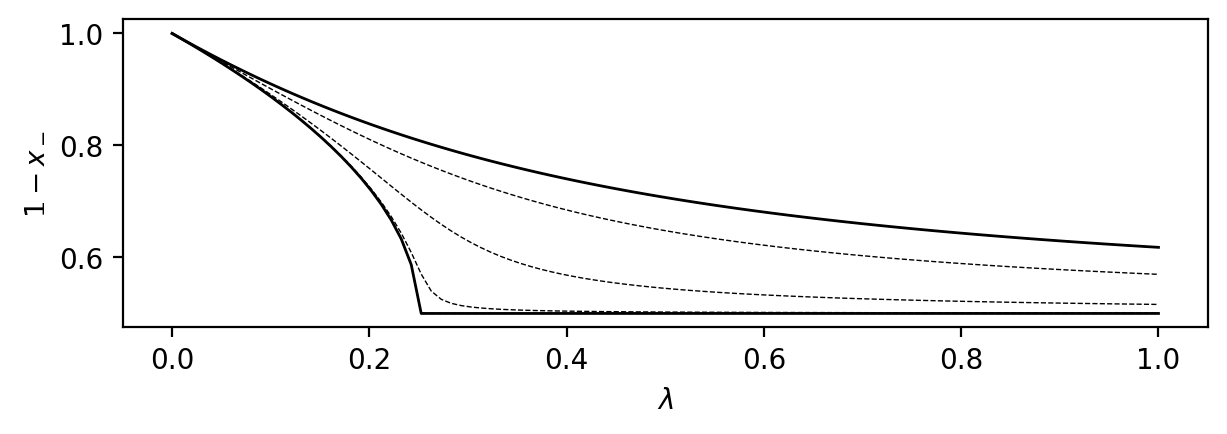

In [5]:
# Define the replicator-mutator equation without delays
def replicator_mutator_fixed_points(x, q, mu, game_parameters):
    a, b, c, d = game_parameters
    return (- x**3 * (a - b - c + d) 
            + x**2 * (q * (a - b + c - d) - 2 * c + 3 * d - b)
            + x * (q * (b - c + 2 * d) + c - 3 * d - 2 * mu)
            + d * (1 - q) + mu)

# Range of q values
mu_values = np.linspace(0, 1, 100)

q = 1.0

# Fixed points for mu = 0 and mu = 0.1
p_values = np.linspace(1, 0.5, 10)
p_values = [0.5, 0.5025, 0.55, 0.75, 1.0]
fixed_points = {p: [] for p in p_values}

# Calculate the fixed points
for mu in mu_values:
    for p in p_values:
        #p = .5
        a, b, c, d = 2, 0, 4*p-1, 1
        #a, b, c, d = 2, 0, 1, 1
        game_parameters = (a, b, c, d)
        # Solve for fixed points using fsolve
        #fp = fsolve(replicator_mutator_fixed_points, x0=.2, args=(q, mu))
        #fixed_points[mu].append(fp[0])
        # use more accurate method
        fp = fsolve(replicator_mutator_fixed_points, x0=0.0, args=(q, mu, game_parameters), xtol=1e-12)
        fixed_points[p].append(fp[0])


# Plot the fixed points as a function of q
plt.figure(figsize=(7, 2))
for p in p_values:
    #plt.plot(mu_values, fixed_points[q], label=r'$\mu = {mu}$', color='black',lw=1)
    plt.plot(mu_values, 1-np.array(fixed_points[p]), label=r'$\mu = {mu}$', color='black',lw=0.5, ls="--")
plt.plot(mu_values, 1-np.array(fixed_points[1]), label=r'$\mu = {mu}$', color='black',lw=1., ls="-")
plt.plot(mu_values, 1-np.array(fixed_points[0.5]), label=r'$\mu = {mu}$', color='black',lw=1., ls="-")


plt.xlabel(r'$\lambda$')
plt.ylabel(r'$1-x_-$')
#plt.title('Fixed Points as a Function of $q$ for the Stag Hunt Game')
#plt.legend()
#plt.grid(True)
# plot vertical line at x = 2*(np.sqrt(2)-1)
#plt.axvline(0.5, color='gray', linestyle='--', label='Threshold',lw=1)
# plot horizontal line at x =  (np.sqrt(2)-1)
#plt.axhline(np.sqrt(2)-1, color='gray', linestyle='--', label='Threshold',lw=1)
# verical lien at mu = 1/6
#plt.axvline(1/10, color='gray', linestyle='--', label='Threshold',lw=1)
plt.show()
